In [1]:
import os
import numpy as np
import pandas as pd
import random as r
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def breaker(num: int=50, char: str="*") -> None:
    print("\n" + num*char + "\n")

    
def get_object_columns(df) -> list:
    object_columns: list = []
    for col in df.columns:
        if df[col].dtype == "object":
            object_columns.append(col)

    return object_columns

In [3]:
class CFG(object):
    def __init__(self,
                 seed: int = 42,
                 n_splits: int = 5,
                 show_info: bool = False,
                 ):

        self.seed = seed
        self.n_splits = n_splits
        self.show_info = show_info
        self.train_data_read_path = "../input/predict-potential-spammers-on-fiverr/train.csv"
        self.test_data_read_path = "../input/predict-potential-spammers-on-fiverr/test.csv"
        self.ss_data_read_path = "../input/predict-potential-spammers-on-fiverr/sample_submission.csv"
        self.model_save_path = "models"
        if not os.path.exists(self.model_save_path): os.makedirs(self.model_save_path)

cfg = CFG(seed=42, show_info=True)

In [4]:
tr_data = pd.read_csv(cfg.train_data_read_path)
tr_data.drop(columns=["user_id"], inplace=True)
tr_data.head(5)

,label,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51
0,0,20972,14,13,3,11,1,2,15,26,...,0,0,0,0,0,0,0,0,1,0
1,0,7362,213,71,3,11,1,2,15,26,...,0,0,0,0,0,0,0,0,0,0
2,0,21216,215,71,3,11,1,2,15,14,...,0,0,0,0,0,0,0,0,0,0
3,0,2261,212,71,2,8,1,2,15,14,...,0,0,0,0,0,0,0,1,0,0
4,0,4543,213,71,2,8,1,2,15,14,...,0,0,0,0,0,0,0,0,0,0


In [5]:
object_columns = get_object_columns(tr_data)
breaker()
print(object_columns)
breaker()

if len(object_columns) != 0:
    print("No.of Unique Values\n")
    for object_column in object_columns:
        print(f"{object_column} : {tr_data[object_column].nunique()}")
    breaker()


**************************************************

[]

**************************************************



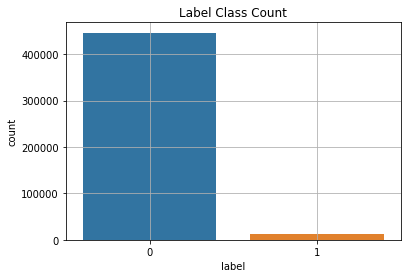

In [6]:
sns.countplot(data=tr_data, x="label")
plt.grid()
plt.title("Label Class Count")
plt.show()